In [84]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
ticker = ['RELIANCE.NS']
data = yf.download(ticker, period='2y')
data.reset_index(inplace=True)

data['50_Day_SMA'] = data['Close'].rolling(50).mean()
data['200_Day_SMA'] = data['Close'].rolling(200).mean()

/tmp/ipython-input-579080787.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='2y')
[*********************100%***********************]  1 of 1 completed


## 1.1 Simple Moving Averages

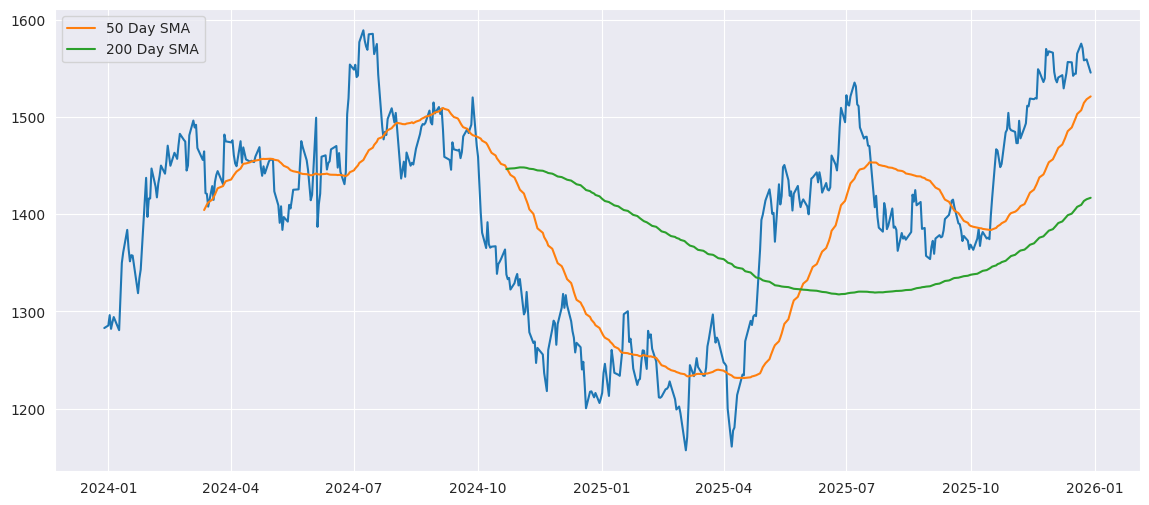

In [118]:
plt.figure(figsize=(14,6))
plt.plot(data['Date'],data['Close'])
plt.plot(data['Date'],data['50_Day_SMA'], label='50 Day SMA')
plt.plot(data['Date'],data['200_Day_SMA'], label='200 Day SMA')
plt.legend()
plt.show()

## 1.2 Gap Up and Gap Down

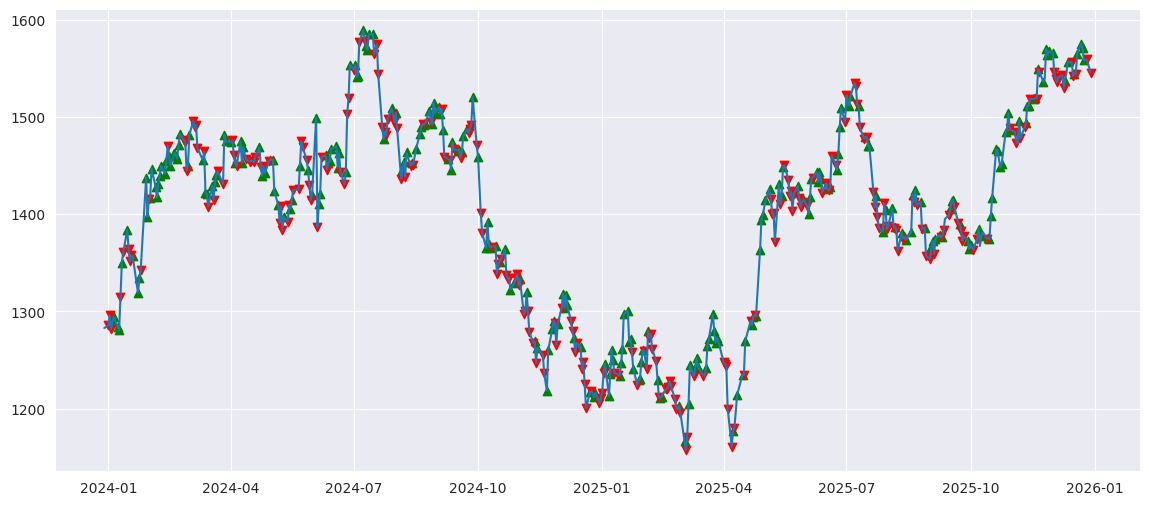

In [119]:
# multi column values so flattening columns
data.columns = data.columns.get_level_values(0)
data["Last_Close"] = data["Close"].shift(1)

data["Gap_Up"] = data["Open"] > data["Last_Close"]
data["Gap_Down"] = data["Open"] < data["Last_Close"]

plt.figure(figsize=(14,6))
plt.plot(data['Date'],data["Close"])
plt.scatter(data.loc[data["Gap_Up"], "Date"],data.loc[data["Gap_Up"], "Close"], marker="^", color="green")
plt.scatter(data.loc[data["Gap_Down"], "Date"],data.loc[data["Gap_Down"], "Close"], marker="v", color="red")

## 1.3 Intraday VWAP

In [88]:
data_vwap = yf.download(ticker, period='60d', interval='5m')
data_vwap.reset_index(inplace=True)
data_vwap.columns = data_vwap.columns.get_level_values(0)

/tmp/ipython-input-2301899608.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_vwap = yf.download(ticker, period='60d', interval='5m')
[*********************100%***********************]  1 of 1 completed


In [89]:
data_vwap

Price,Datetime,Close,High,Low,Open,Volume
0,2025-10-06 03:45:00+00:00,1362.300049,1363.599976,1360.599976,1362.699951,0
1,2025-10-06 03:50:00+00:00,1363.000000,1363.800049,1359.699951,1362.599976,1281304
2,2025-10-06 03:55:00+00:00,1363.900024,1365.800049,1361.000000,1363.000000,983124
3,2025-10-06 04:00:00+00:00,1362.900024,1363.900024,1361.900024,1363.800049,134239
4,2025-10-06 04:05:00+00:00,1363.800049,1363.900024,1362.699951,1362.900024,84502
...,...,...,...,...,...,...
4284,2025-12-29 09:35:00+00:00,1545.699951,1547.699951,1545.099976,1545.199951,374659
4285,2025-12-29 09:40:00+00:00,1544.699951,1546.099976,1544.699951,1545.400024,143628
4286,2025-12-29 09:45:00+00:00,1544.099976,1544.699951,1543.599976,1544.699951,213939
4287,2025-12-29 09:50:00+00:00,1546.400024,1546.400024,1544.099976,1544.300049,100940


In [114]:
data_vwap["Typical Price"] = (data_vwap["High"] + data_vwap["Low"] +data_vwap["Close"])/3
data_vwap["Volume Price"] = data_vwap["Typical Price"] * data_vwap["Volume"]

data_vwap["Date_Only"] = data_vwap["Datetime"].dt.date

data_vwap["Total VP"] = data_vwap["Volume Price"].groupby(data_vwap["Date_Only"]).cumsum()
data_vwap["Total Volume"] = data_vwap["Volume"].groupby(data_vwap["Date_Only"]).cumsum()

data_vwap["VWAP"] = data_vwap["Total VP"]/data_vwap["Total Volume"]
data_vwap

Price,Datetime,Close,High,Low,Open,Volume,Typical Price,Volume Price,Date_Only,Total VP,Total Volume,VWAP,Date
0,2025-10-06 03:45:00+00:00,1362.300049,1363.599976,1360.599976,1362.699951,0,1362.166667,0.000000e+00,2025-10-06,0.000000e+00,0,NaN,2025-10-06 03:45:00+00:00
1,2025-10-06 03:50:00+00:00,1363.000000,1363.800049,1359.699951,1362.599976,1281304,1362.166667,1.745350e+09,2025-10-06,1.745350e+09,1281304,1362.166667,2025-10-06 03:50:00+00:00
2,2025-10-06 03:55:00+00:00,1363.900024,1365.800049,1361.000000,1363.000000,983124,1363.566691,1.340555e+09,2025-10-06,3.085905e+09,2264428,1362.774501,2025-10-06 03:55:00+00:00
3,2025-10-06 04:00:00+00:00,1362.900024,1363.900024,1361.900024,1363.800049,134239,1362.900024,1.829543e+08,2025-10-06,3.268859e+09,2398667,1362.781526,2025-10-06 04:00:00+00:00
4,2025-10-06 04:05:00+00:00,1363.800049,1363.900024,1362.699951,1362.900024,84502,1363.466675,1.152157e+08,2025-10-06,3.384075e+09,2483169,1362.804842,2025-10-06 04:05:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,2025-12-29 09:35:00+00:00,1545.699951,1547.699951,1545.099976,1545.199951,374659,1546.166626,5.792852e+08,2025-12-29,8.073338e+09,5215828,1547.853640,2025-12-29 09:35:00+00:00
4285,2025-12-29 09:40:00+00:00,1544.699951,1546.099976,1544.699951,1545.400024,143628,1545.166626,2.219292e+08,2025-12-29,8.295268e+09,5359456,1547.781631,2025-12-29 09:40:00+00:00
4286,2025-12-29 09:45:00+00:00,1544.099976,1544.699951,1543.599976,1544.699951,213939,1544.133301,3.303503e+08,2025-12-29,8.625618e+09,5573395,1547.641587,2025-12-29 09:45:00+00:00
4287,2025-12-29 09:50:00+00:00,1546.400024,1546.400024,1544.099976,1544.300049,100940,1545.633341,1.560162e+08,2025-12-29,8.781634e+09,5674335,1547.605862,2025-12-29 09:50:00+00:00


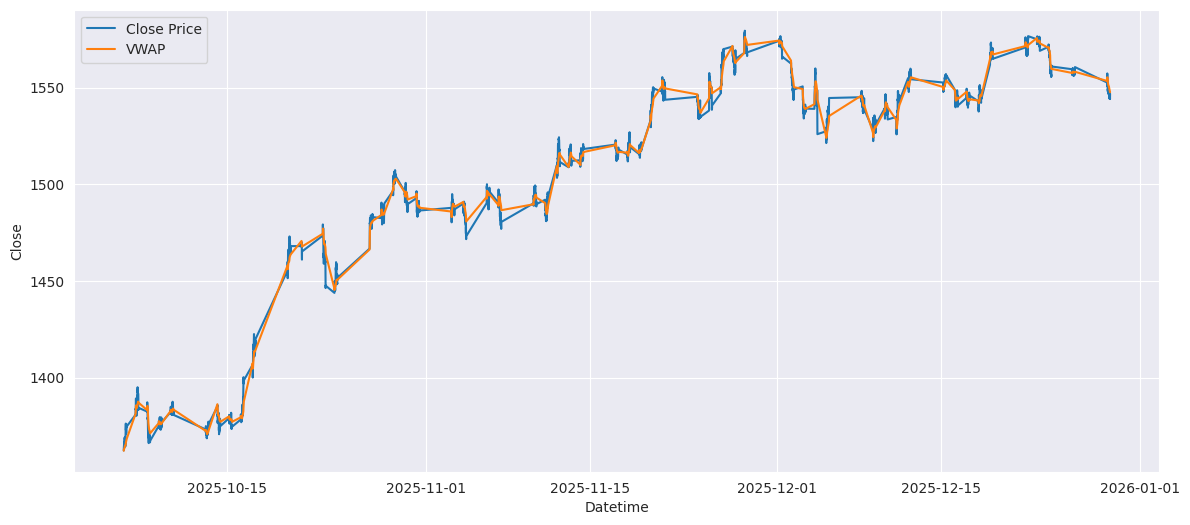

In [123]:
plt.figure(figsize=(14, 6))

sns.lineplot(data=data_vwap, x="Datetime", y="Close", label="Close Price")
sns.lineplot(data=data_vwap, x="Datetime", y="VWAP", label="VWAP")
plt.show()

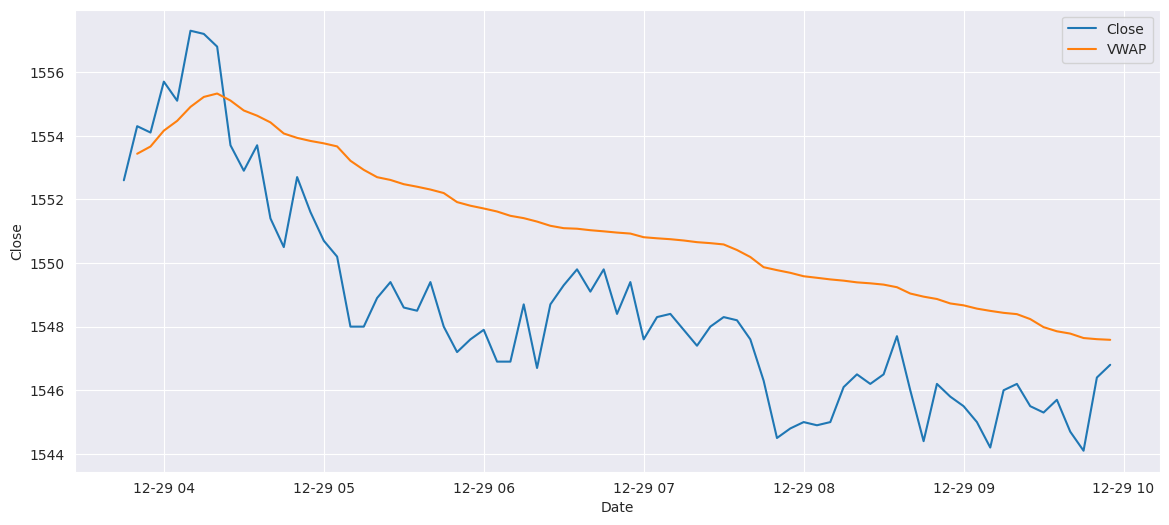

In [124]:
latest = data_vwap[data_vwap["Date_Only"] == data_vwap["Date_Only"].iloc[-1]]

plt.figure(figsize=(14, 6))
sns.lineplot(data=latest, x="Date", y="Close", label="Close")
sns.lineplot(data=latest, x="Date", y="VWAP", label="VWAP")
plt.show()